<a href="https://colab.research.google.com/github/rodrigo103/AprendizajeAutomatico/blob/main/TP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo Práctico 1

## Objetivos del trabajo práctico
Para el desarrollo del primer trabajo práctico, se espera que el alumno demuestre el aprendizaje de los temas de las unidades temáticas presentadas hasta el momento, a través de la exploración y solución de un set de datos asignado por la cátedra, enfatizando sobre los siguientes temas:

- Análisis exploratorio de datos. Describir y explorar un dataset y mostrar visualizaciones, indicadores y conclusiones.
- Entrenamiento de un clasificador. Entrenar un clasificador de acuerdo a las instrucciones para cada dataset y usar métricas de evaluación adecuadas
- Entrenamiento de un regresor. Entrenar un regresor de acuerdo a las instrucciones para cada dataset y usar métricas de evaluación adecuadas

## Entregables
A cada grupo se le asignará un dataset e instrucciones. Se espera que cada grupo de alumnos entregue, como parte del trabajo práctico, como mínimo, los siguientes documentos, a más tardar, el Domingo 16 de Octubre a las 23:59 horas.

#### Documentos obligatorios:
- Al menos un Jupyter Notebook que corra en un solo paso en Google Colab, el mismo deberá ser
guardado con las salidas de cada celda ya ejecutadas y en un solo paso. Alternativamente podrán
entregar un Jupyter Notebook por cada objetivo.
- Al menos un documento en formato PDF que corresponda con la salida del Notebook de Jupyter.
- Un documento en formato PDF con la finalidad de que sirva de material de soporte para la
presentación del trabajo. Esta presentación deberá contener, como mínimo, 10 páginas:
  - 1 diapositiva de descripción del set de datos
  - 3 diapositivas del análisis exploratorio de datos
  - 3 diapositivas mostrando la solución del problema de Clasificación
  - 3 diapositivas mostrando la solución del problema de Regresión

## Clase de presentación
Los alumnos deberán realizar una presentación a través de la plataforma meet y en el horario de la clase virtual, con los resultados obtenidos.
La clase de presentación será el Jueves 20 de Octubre.
Para poner en común los desarrollos de los trabajas prácticos adoptaremos el siguiente formato como base:
- Cada grupo dispondrá de 15 minutos para presentar el trabajo, con una división equitativa del contenido entre los integrantes.
- Para cada presentación, tanto los docentes como los alumnos que atiendan la misma dispondrán de 5 minutos luego de la misma, en el que podrán realizar preguntas a cada integrante
en particular o al grupo en general, sobre cualquiera de los temas presentados.
- Se evaluará tanto el desarrollo como el conocimiento expuesto. Se prestará especial atención a la elección de las métricas de evaluación, así como también al procedimiento que realice y a los resultados.

## Fechas
Fecha límite para entregables
- Domingo 16 de Octubre del 2022

Fecha de presentación de trabajos prácticos:
- Jueves 20 de Octubre del 2022

## Distribución de grupos y tema
Los grupos estarán compuestos por 2 o 3 integrantes.
El dataset para cada grupo es:  
https://archive-beta.ics.uci.edu/ml/datasets/online+news+popularity#Descriptive

EDA: Cada grupo deberá realizar un EDA para todas las variables del dataset.

Clasiﬁcación: Cada grupo deberá entrenar y validar un clasiﬁcador multiclase para predecir la característica Shared

Regresión: Cada grupo deberá entrenar un regresor que prediga la cantidad de veces que fue compartida la noticia

## Clasiﬁcación
Para generar la columna target del ejercicio de clasiﬁcación, deberá valerse de la siguiente función:
```python
def get_label(share):
  if share <= 870:
    return 'Very Poor'
  elif share <= 1200:
    return 'Poor'
  elif share <= 1800:
    return 'Average'
  elif share <= 3400:
    return 'Good'
  else:
    return 'Very Good'

data['shares_clasif'] = data['shares'].apply(get_label)
```

In [2]:
# Librerías de análisis de datos

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from pandas.api.types import CategoricalDtype

from pandas.plotting import scatter_matrix

from pprint import pprint

In [3]:
# Librerías de Machine Learning

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRegressor
from xgboost import XGBClassifier

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!pwd

/content


In [6]:
!ls drive/MyDrive/AprendizajeAutomatico

'Copia de Copia de TP1.ipynb'		       Presentación.gslides
 online-news_Fernandes-Vinagre-Sernadela.pdf   TP1-1.ipynb
 OnlineNewsPopularity.csv		       TP1_Clasificacion.ipynb
 OnlineNewsPopularity.names		       TP1.ipynb


In [7]:
df = pd.read_csv("drive/MyDrive/AprendizajeAutomatico/OnlineNewsPopularity.csv", sep=', ')
df.describe()

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


Corriendo el siguiente código puedo generar la columna de los target para la claficación.

In [8]:
def get_label(share):
  if share <= 870:
    return 'Very Poor'
  elif share <= 1200:
    return 'Poor'
  elif share <= 1800:
    return 'Average'
  elif share <= 3400:
    return 'Good'
  else:
    return 'Very Good'

df['shares_clasif'] = df['shares'].apply(get_label)
df

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,shares_clasif
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,Very Poor
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,Very Poor
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,Average
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,Poor
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,Very Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,http://mashable.com/2014/12/27/samsung-app-aut...,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,...,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800,Average
39640,http://mashable.com/2014/12/27/seth-rogen-jame...,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,...,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900,Good
39641,http://mashable.com/2014/12/27/son-pays-off-mo...,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,...,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900,Good
39642,http://mashable.com/2014/12/27/ukraine-blasts/,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,...,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100,Poor


Para el análisis exploratorio me parecería interesante hacer gráficos que muestren la distribución de shares para las noticias de los distintos data_channel (son 6)
También me parece interesante graficar la relación entre número de imagenes y numero de shares y entre número de videos y numero de shares y entre la suma de ambos y numero de shares.

También me parece interesante graficar el número de shares con respecto al día de la semana de la noticia.


Hay muchas columnas de las cuales no entiendo bien su significado.
- Que es el timedelta?
  - Es la cantidad de días entre que se publicó el artículo y que se armó el dataset. Es decir, nos indica cuantos shares se realizaron desde que se publicó la noticia hasta que se midieron los shares en el dataset.
- Que es un token y por que tiene largo.
  - Un token es como se llama en este caso a una palabra (lo puedo deducir de leer la linea 2 de Attribute Information)
- que es una palabra non-stop?
  - Las palabras stop son palabras vacías o que no tienen significado por si mismas, por ejemplo conectores.
- Que es una palabra clave
- Las mejores y peores palabras clave
- Los shares de auto referencia
- La cercanía a los tópicos LDA (Latent Dirichlet Allocation)
- La positividad o negatividad de las palabras en el contenido
- rate_positive_words
    - Creo que es igual a:  
  $\frac{positive\ words}{positive\ words + negative\ words}$  
  Y con rate_positive_words es similar, entonces siempre se va a dar que
  $ \text{rate_positive_words} + \text{rate_negative_words}  = 1$  
  excepto que ambas sean cero, lo cual explica la curva que trazó Victor
- los tokens no neutrales
- Las relacionadas a la polaridad de las palabras
- Las relacionadas a la subjetividad

Despues de hacer este listado con dudas inicialmente se me ocurre que el timedelta, (que es el dato mas importante que nos condiciona es la cantidad de shares) es un buen predictor de la cantidad de shares y se debería de alguna forma anular su efecto. Pero definitivamente se debe hacer un gráfico de shares vs timedelta.
Igualmente tal vez me equivoco, porque es esperable es que apenas se publique una noticia se comparta varias veces mientras es nueva y cuando pasa el tiempo se comparta cada vez menos, por lo que si el timedelta es suficentemente grande no debería afectar a la cantidad de shares.

Escribir ejemplos de palabras positivas y ejemplos de palabras negativas.

Tal vez se podría observar gráficando global_rate_of_positive_works vs shares y lo mismo para las negativas que a mas palabras negativas mas se comparte un artículo.

Con la siguiente linea verificamos que en el dataframe no hay lineas faltantes.

In [9]:
df.isnull().sum().sum()

0

Se separa el dataframe en features (X) y target (y)

In [15]:
features = [
    'timedelta', 
    # Words
    'n_tokens_title', 'n_tokens_content', 
    'average_token_length', 
    'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
    'num_hrefs', 'num_self_hrefs',
    # Digital Media
    'num_imgs', 'num_videos', 
    # Links
    'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess', 
    # Time
    'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday', 
    'is_weekend', 
    # Keywords
    'num_keywords', 
    'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 
    'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world', 
    # Natural Language Processing
    'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 
    'global_subjectivity', 'global_sentiment_polarity', 
    'global_rate_positive_words', 'global_rate_negative_words', 
    'rate_positive_words', 'rate_negative_words', 
    'avg_positive_polarity', 'min_positive_polarity', 'max_positive_polarity', 
    'avg_negative_polarity', 'min_negative_polarity', 'max_negative_polarity', 
    'title_subjectivity', 'title_sentiment_polarity', 'abs_title_subjectivity', 'abs_title_sentiment_polarity'
]

X = df[features]
y = df.shares


Lo primero que hay que hacer es separar un conjunto de datos para test

In [16]:
trainval_X, test_X, trainval_y, test_y = train_test_split(X, y, random_state = 0, test_size = 0.3)

Ahora separo el conjunto de datos restante (trainval) en entrenamiento (train) y validación (val)

In [18]:
train_X, val_X, train_y, val_y = train_test_split(trainval_X, trainval_y, random_state = 0)

Relizo un entrenamiento con varios modelos sin realizar ningun tratamiento sobre los datos para establecer una linea de base

In [19]:
# Funcion para comparar distintos modelos
def score_model(model, X_t=train_X, X_v=val_X, y_t=train_y, y_v=val_y):
    model.fit(X_t, y_t)
    preds = model.predict(X_v)
    return mean_absolute_error(y_v, preds), mean_squared_error(y_v, preds)

models = [
    DecisionTreeRegressor(max_leaf_nodes=None, random_state=1),
    DecisionTreeRegressor(max_leaf_nodes=2, random_state=1),
    DecisionTreeRegressor(max_leaf_nodes=3, random_state=1),
    DecisionTreeRegressor(max_leaf_nodes=4, random_state=1),
    DecisionTreeRegressor(max_leaf_nodes=5, random_state=1),
    DecisionTreeRegressor(max_leaf_nodes=6, random_state=1),
    DecisionTreeRegressor(max_leaf_nodes=7, random_state=1),
    DecisionTreeRegressor(max_leaf_nodes=8, random_state=1),
    DecisionTreeRegressor(max_leaf_nodes=9, random_state=1),
    DecisionTreeRegressor(max_leaf_nodes=10, random_state=1),
    DecisionTreeRegressor(max_leaf_nodes=20, random_state=1),
    DecisionTreeRegressor(max_leaf_nodes=30, random_state=1),
    DecisionTreeRegressor(max_leaf_nodes=40, random_state=1),
    DecisionTreeRegressor(max_leaf_nodes=50, random_state=1),
    DecisionTreeRegressor(max_leaf_nodes=500, random_state=1),
    DecisionTreeRegressor(max_leaf_nodes=5000, random_state=1),
#     RandomForestRegressor(random_state=1)
#     RandomForestRegressor(n_estimators=50, random_state=1),
#     RandomForestRegressor(n_estimators=100, random_state=1),
#     # RandomForestRegressor(n_estimators=100, criterion='absolute_error', random_state=1),
#     # RandomForestRegressor(n_estimators=200, min_samples_split=20, random_state=1),
#     # RandomForestRegressor(n_estimators=100, max_depth=7, random_state=1),
    XGBRegressor(), 
    XGBRegressor(n_estimators=500), 
    XGBRegressor(n_estimators=1000, learning_rate=0.05),
]

for i in range(0, len(models)):
    mae, mse = score_model(models[i])
    print("Model %d MAE: %d MSE: %d" % (i+1, mae, mse))

# Pruebo usando early stopping
my_model2 = XGBRegressor(n_estimators=500)
my_model2.fit(train_X, train_y,
              early_stopping_rounds=5, 
             eval_set=[(val_X, val_y)],
             verbose=False)
preds = my_model2.predict(val_X)
print("MAE: " + str(mean_absolute_error(preds, val_y)) + "MSE: " + str(mean_squared_error(preds, val_y)))

Model 1 MAE: 4264 MSE: 280760677
Model 2 MAE: 3140 MSE: 70891878
Model 3 MAE: 3165 MSE: 86046470
Model 4 MAE: 3118 MSE: 70707089
Model 5 MAE: 3135 MSE: 72381574
Model 6 MAE: 3097 MSE: 70539063
Model 7 MAE: 3054 MSE: 70193684
Model 8 MAE: 3100 MSE: 74416561
Model 9 MAE: 3391 MSE: 289143121
Model 10 MAE: 3385 MSE: 289104679
Model 11 MAE: 3328 MSE: 289014433
Model 12 MAE: 3321 MSE: 294289063
Model 13 MAE: 3343 MSE: 308962942
Model 14 MAE: 3363 MSE: 315534877
Model 15 MAE: 3730 MSE: 361499970
Model 16 MAE: 4415 MSE: 375135940
[21:03:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model 17 MAE: 3015 MSE: 76966148
[21:03:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model 18 MAE: 3127 MSE: 84498530
[21:03:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model 19 MAE: 3086 MSE: 8

Grafico distribución de shares

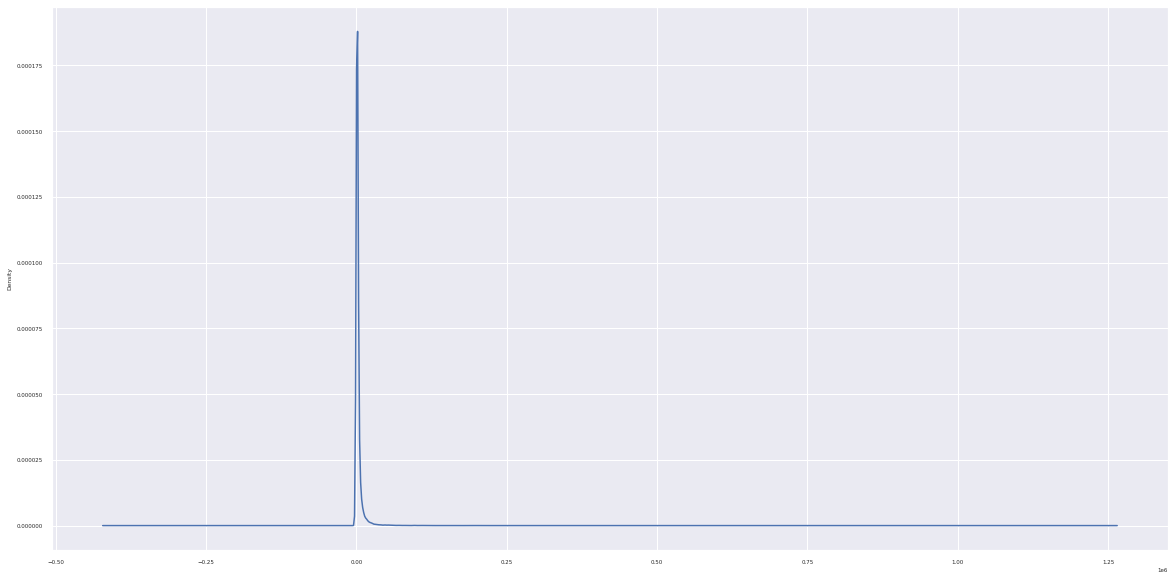

In [ ]:
df.shares.plot(kind="kde", figsize=(20, 10))

Grafico cantidad de shares respecto de timedelta.

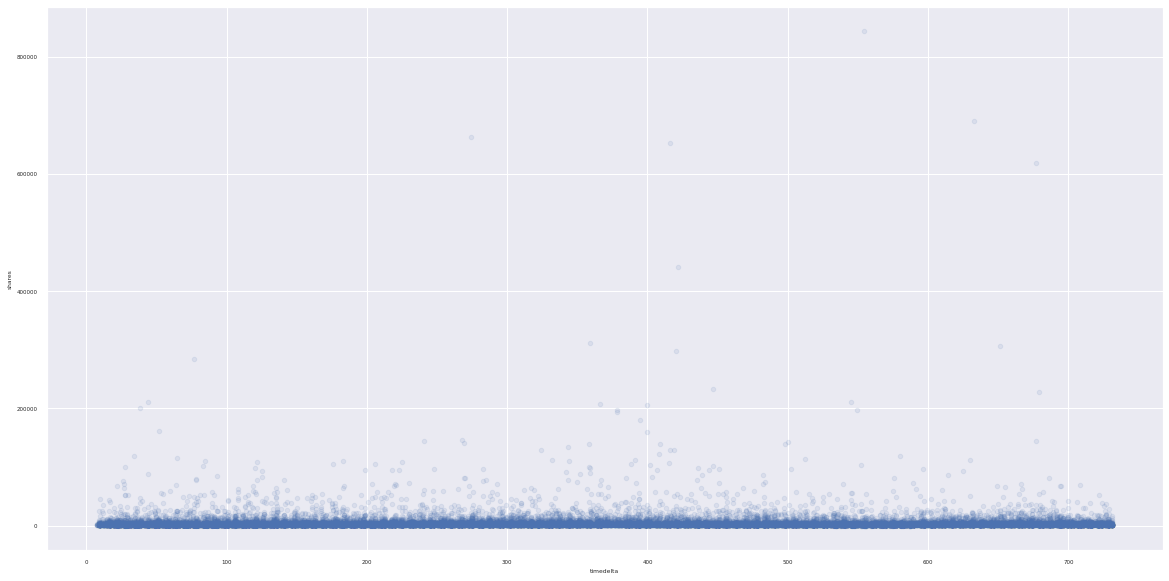

In [ ]:
df.plot(kind="scatter", x="timedelta", y="shares", alpha=0.1, figsize=(20, 10))

El gráfico anterior parece mostrar que la cantidad de shares es independiente del timedelta. Es decir, no porque haya pasado mas tiempo desde que se publicó la noticia hasta que se midieron los shares va a tener mas cantidad de shares.

Hago un gráfico seteando a ojo un umbral para excluir los outliners

Haciendo un acercamiento (recortando las noticias con mas de 40000 compartidas) podemos ver que no se oberva ninguna relación relevante.

(0.0, 40000.0)

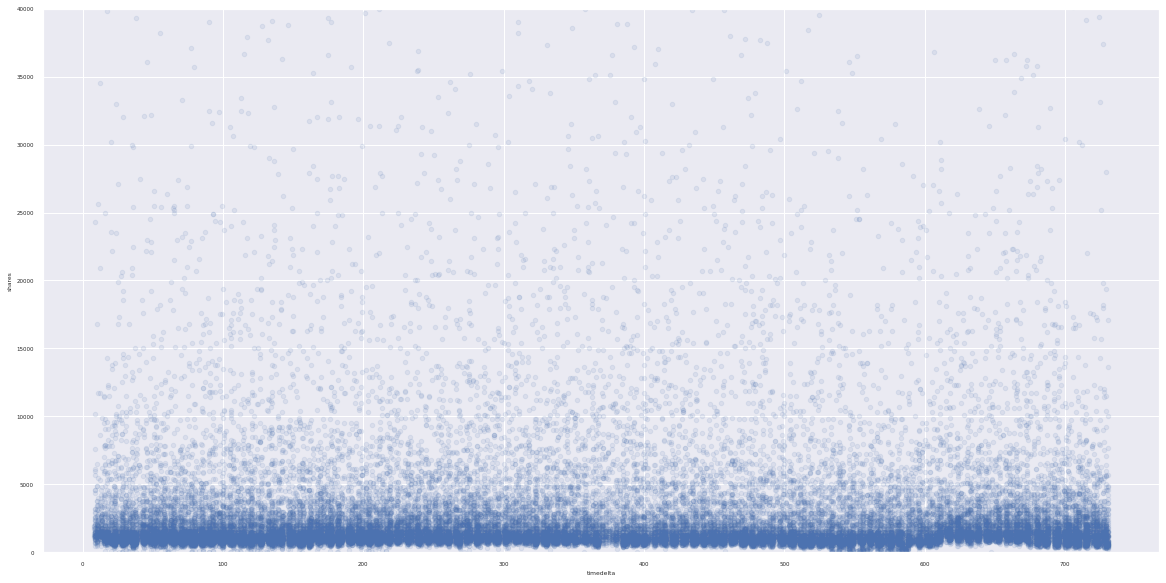

In [ ]:
df.plot(kind="scatter", x="timedelta", y="shares", alpha=0.1, figsize=(20, 10)).set_ylim(0,40000)

Excluyo las noticias con mas de 40000 compartidas del dataframe

In [ ]:
# df = df[df.shares < 40000]

Esto que hice esta mal, lo que hay que hacer es esto mismo pero sobre train_X y train_y

Vuelvo a correr los modelos para observar si hay alguna mejora

In [ ]:
features = [
    'timedelta', 
    # Words
    'n_tokens_title', 'n_tokens_content', 
    'average_token_length', 
    'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
    'num_hrefs', 'num_self_hrefs',
    # Digital Media
    'num_imgs', 'num_videos', 
    # Links
    'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess', 
    # Time
    'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday', 
    'is_weekend', 
    # Keywords
    'num_keywords', 
    'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 
    'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world', 
    # Natural Language Processing
    'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 
    'global_subjectivity', 'global_sentiment_polarity', 
    'global_rate_positive_words', 'global_rate_negative_words', 
    'rate_positive_words', 'rate_negative_words', 
    'avg_positive_polarity', 'min_positive_polarity', 'max_positive_polarity', 
    'avg_negative_polarity', 'min_negative_polarity', 'max_negative_polarity', 
    'title_subjectivity', 'title_sentiment_polarity', 'abs_title_subjectivity', 'abs_title_sentiment_polarity'
]

X = df[features]
y = df.shares

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

train_X['shares'] = train_y
train_X = train_X[train_X.shares < 40000]
train_y = train_X.shares
train_X = train_X[features]

In [ ]:
# Funcion para comparar distintos modelos
def score_model(model, X_t=train_X, X_v=val_X, y_t=train_y, y_v=val_y):
    model.fit(X_t, y_t)
    preds = model.predict(X_v)
    return mean_absolute_error(y_v, preds), mean_squared_error(y_v, preds)

models = [
    DecisionTreeRegressor(max_leaf_nodes=None, random_state=1),
    DecisionTreeRegressor(max_leaf_nodes=2, random_state=1),
    DecisionTreeRegressor(max_leaf_nodes=3, random_state=1),
    DecisionTreeRegressor(max_leaf_nodes=4, random_state=1),
    DecisionTreeRegressor(max_leaf_nodes=5, random_state=1),
    DecisionTreeRegressor(max_leaf_nodes=6, random_state=1),
    DecisionTreeRegressor(max_leaf_nodes=7, random_state=1),
    DecisionTreeRegressor(max_leaf_nodes=8, random_state=1),
    DecisionTreeRegressor(max_leaf_nodes=9, random_state=1),
    DecisionTreeRegressor(max_leaf_nodes=10, random_state=1),
    DecisionTreeRegressor(max_leaf_nodes=20, random_state=1),
    DecisionTreeRegressor(max_leaf_nodes=30, random_state=1),
    DecisionTreeRegressor(max_leaf_nodes=40, random_state=1),
    DecisionTreeRegressor(max_leaf_nodes=50, random_state=1),
    DecisionTreeRegressor(max_leaf_nodes=500, random_state=1),
    DecisionTreeRegressor(max_leaf_nodes=5000, random_state=1),
#     RandomForestRegressor(random_state=1)
#     RandomForestRegressor(n_estimators=50, random_state=1),
#     RandomForestRegressor(n_estimators=100, random_state=1),
#     # RandomForestRegressor(n_estimators=100, criterion='absolute_error', random_state=1),
#     # RandomForestRegressor(n_estimators=200, min_samples_split=20, random_state=1),
#     # RandomForestRegressor(n_estimators=100, max_depth=7, random_state=1),
    XGBRegressor(), 
    XGBRegressor(n_estimators=500), 
    XGBRegressor(n_estimators=1000, learning_rate=0.05),
]

for i in range(0, len(models)):
    mae, mse = score_model(models[i])
    print("Model %d MAE: %d MSE: %d" % (i+1, mae, mse))

# Pruebo usando early stopping
my_model2 = XGBRegressor(n_estimators=500)
my_model2.fit(train_X, train_y,
              early_stopping_rounds=5, 
             eval_set=[(val_X, val_y)],
             verbose=False)
preds = my_model2.predict(val_X)
print("MAE: " + str(mean_absolute_error(preds, val_y)) + "MSE: " + str(mean_squared_error(preds, val_y)))

Model 1 MAE: 3398 MSE: 88421117
Model 2 MAE: 2711 MSE: 71640462
Model 3 MAE: 2706 MSE: 71475540
Model 4 MAE: 2691 MSE: 71289647
Model 5 MAE: 2678 MSE: 71165234
Model 6 MAE: 2677 MSE: 71137910
Model 7 MAE: 2678 MSE: 71211418
Model 8 MAE: 2679 MSE: 71258085
Model 9 MAE: 2682 MSE: 71363706
Model 10 MAE: 2675 MSE: 71353749
Model 11 MAE: 2662 MSE: 71443063
Model 12 MAE: 2667 MSE: 71824177
Model 13 MAE: 2678 MSE: 72329209
Model 14 MAE: 2684 MSE: 72678215
Model 15 MAE: 2830 MSE: 79524654
Model 16 MAE: 3286 MSE: 87433279
[17:09:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model 17 MAE: 2599 MSE: 70531328
[17:09:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model 18 MAE: 2600 MSE: 70288165
[17:09:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model 19 MAE: 2600 MSE: 70383189
[

Se comprueba que hay una mejora muy importante en la performance de todos los modelos.

In [ ]:
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39355.000000,39355.000000,39355.000000,39355.000000,39355.000000,39355.000000,39355.000000,39355.000000,39355.000000,39355.000000,...,39355.000000,39355.000000,39355.000000,39355.000000,39355.000000,39355.000000,39355.000000,39355.000000,39355.000000,39355.000000
mean,354.702706,10.395223,546.762749,0.548250,0.996798,0.689321,10.854301,3.295846,4.528573,1.245001,...,0.095397,0.756641,-0.259220,-0.521469,-0.107363,0.281900,0.071126,0.341813,0.155609,2773.000991
std,214.313568,2.112316,470.427848,3.533584,5.250370,3.276744,11.270576,3.857365,8.299963,4.105911,...,0.071215,0.247638,0.127527,0.290091,0.095148,0.323966,0.264870,0.188885,0.225833,4028.958988
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,247.000000,0.470779,1.000000,0.625801,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.327812,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,943.000000
50%,339.000000,10.000000,410.000000,0.539051,1.000000,0.690411,7.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253056,-0.500000,-0.100000,0.144444,0.000000,0.500000,0.000000,1400.000000
75%,543.000000,12.000000,716.000000,0.608295,1.000000,0.754545,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186637,-0.300000,-0.050000,0.500000,0.142857,0.500000,0.250000,2700.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,39900.000000


In [ ]:
print( sum( df.weekday_is_monday == 1 ) )
print( sum( df.weekday_is_tuesday == 1 ) )
print( sum( df.weekday_is_wednesday == 1 ) )
print( sum( df.weekday_is_thursday == 1 ) )
print( sum( df.weekday_is_friday == 1 ) )
print( sum( df.weekday_is_saturday == 1 ) )
print( sum( df.weekday_is_sunday == 1 ) )

6600
7337
7383
7218
5661
2437
2719


Conclusión: Se publican menos noticias los fines de semana, pero este dato en si no nos sirve para predecir la cantidad de shares.

In [ ]:
# mean_shares_by_day = []
# mean_shares_by_day.append( df[df.weekday_is_monday == 1].shares.mean() )
# mean_shares_by_day.append( df[df.weekday_is_tuesday == 1].shares.mean() )
# mean_shares_by_day.append( df[df.weekday_is_wednesday == 1].shares.mean() )
# mean_shares_by_day.append( df[df.weekday_is_thursday == 1].shares.mean() )
# mean_shares_by_day.append( df[df.weekday_is_friday == 1].shares.mean() )
# mean_shares_by_day.append( df[df.weekday_is_saturday == 1].shares.mean() )
# mean_shares_by_day.append( df[df.weekday_is_sunday == 1].shares.mean() )
# pprint(mean_shares_by_day)

# Lo anterior se puede escribir de forma mas concisa como:
array_of_days = ['weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday']

# mean_shares_by_day = { day_of_the_week: df[df[day_of_the_week] == 1].shares.mean() for day_of_the_week in array_of_days }
# pprint(mean_shares_by_day)

mean_shares_by_day = [ df[df[day_of_the_week] == 1].shares.mean() for day_of_the_week in array_of_days ]
pprint(mean_shares_by_day)

[2781.7786363636365,
 2627.6790241243016,
 2603.822159013951,
 2634.8683845940704,
 2766.563857975623,
 3438.27985227739,
 3387.02795145274]


Se pudo comprobar que la cantidad de compartidos por noticia en general es bastante uniforme para todos los días, por lo que ese dato no nos será de mucha utilidad.

(0.0, 5000.0)

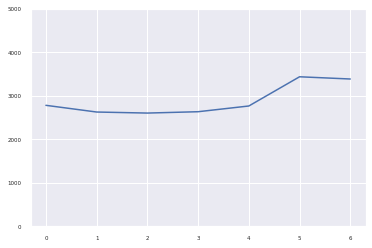

In [ ]:
plt.plot(mean_shares_by_day)
plt.ylim(0, 5000)

Histogramas univariados

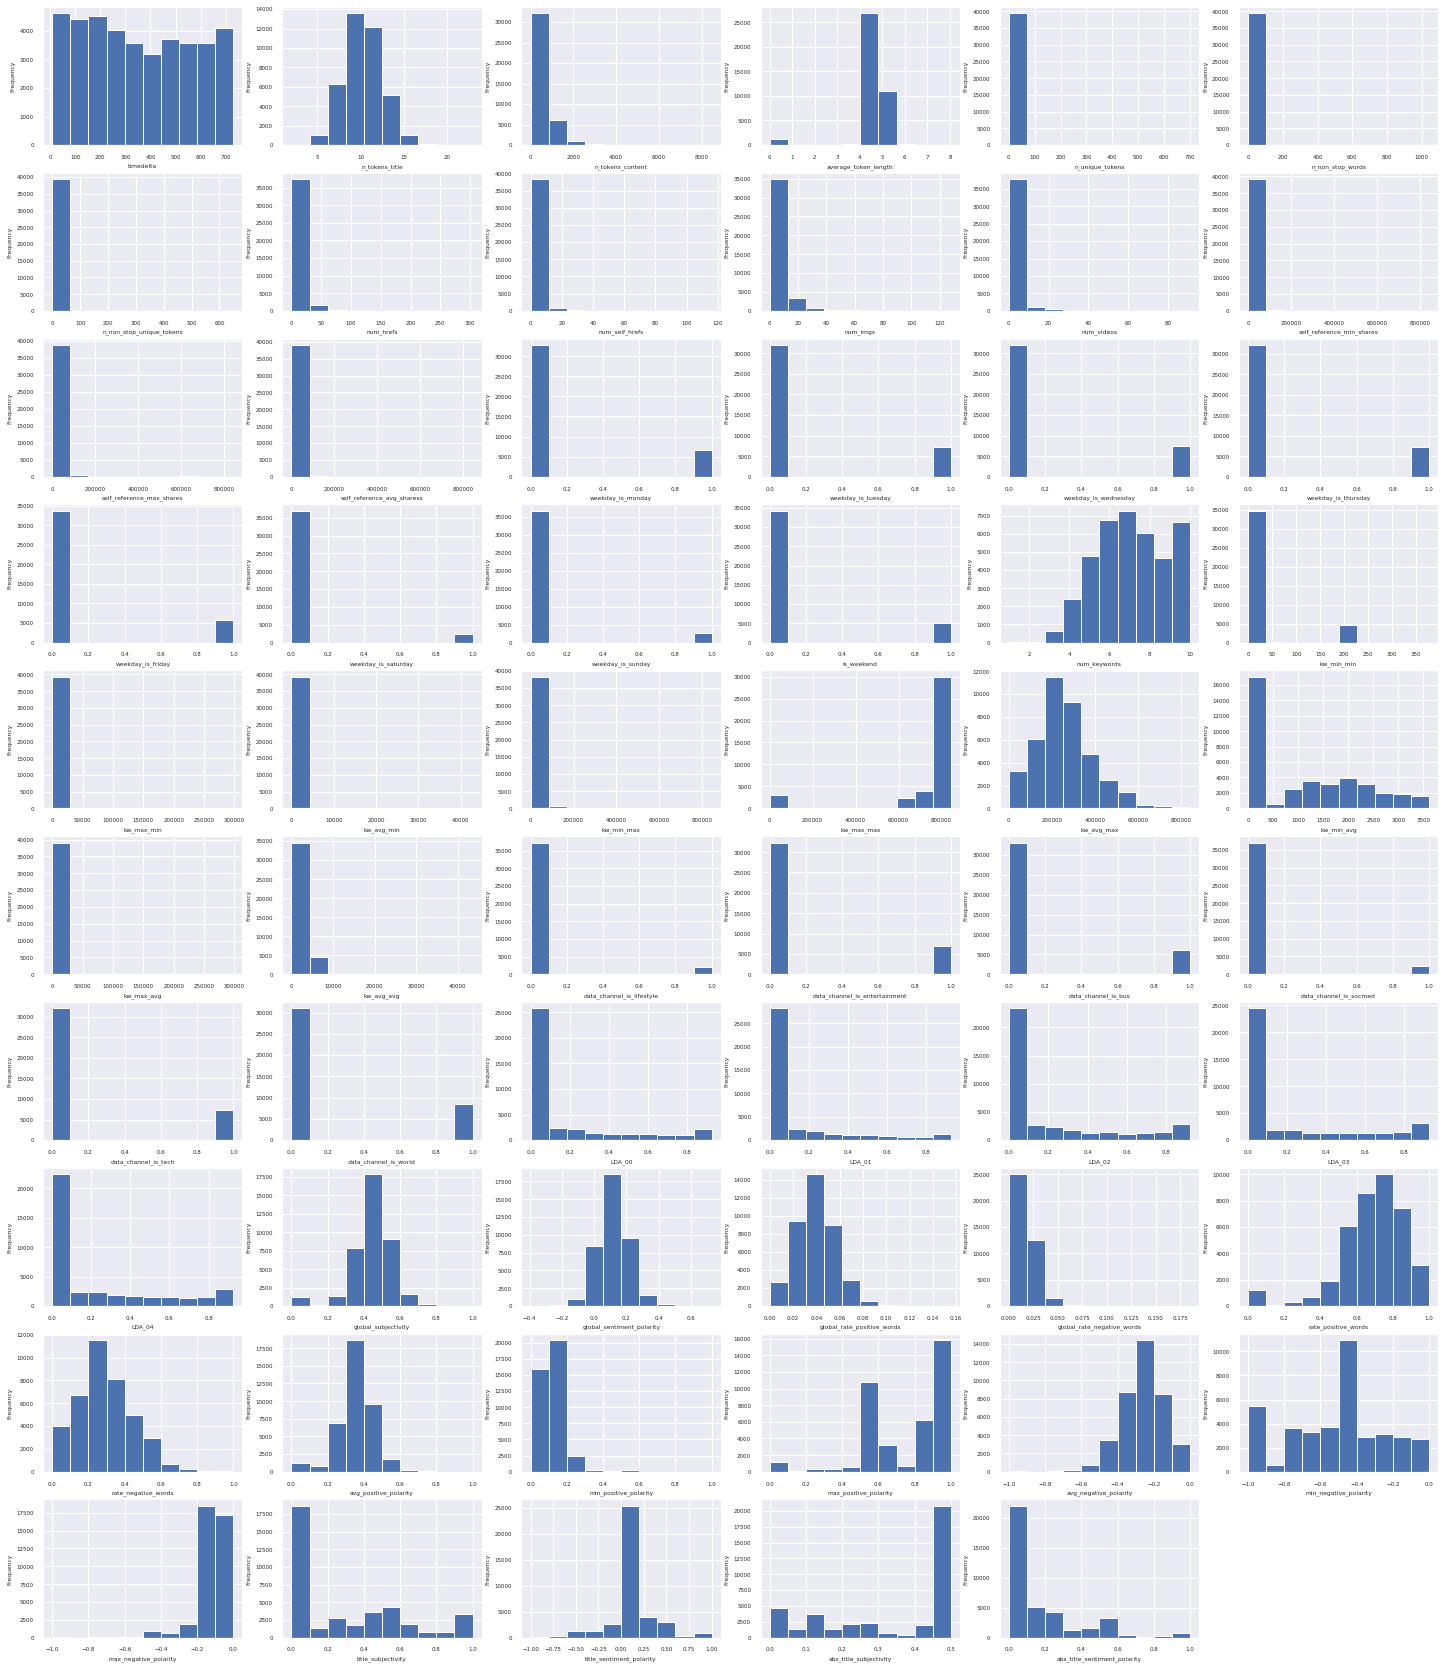

In [ ]:
# univariate analysis
fig = plt.figure(figsize=(25, 30))  
i = 0
for column in X:
    sub = fig.add_subplot(10, 6 , i + 1)
    sub.set_xlabel(column)
    X[column].plot(kind = 'hist')
    i = i + 1

Realizo un gráfico de correlación entre variables

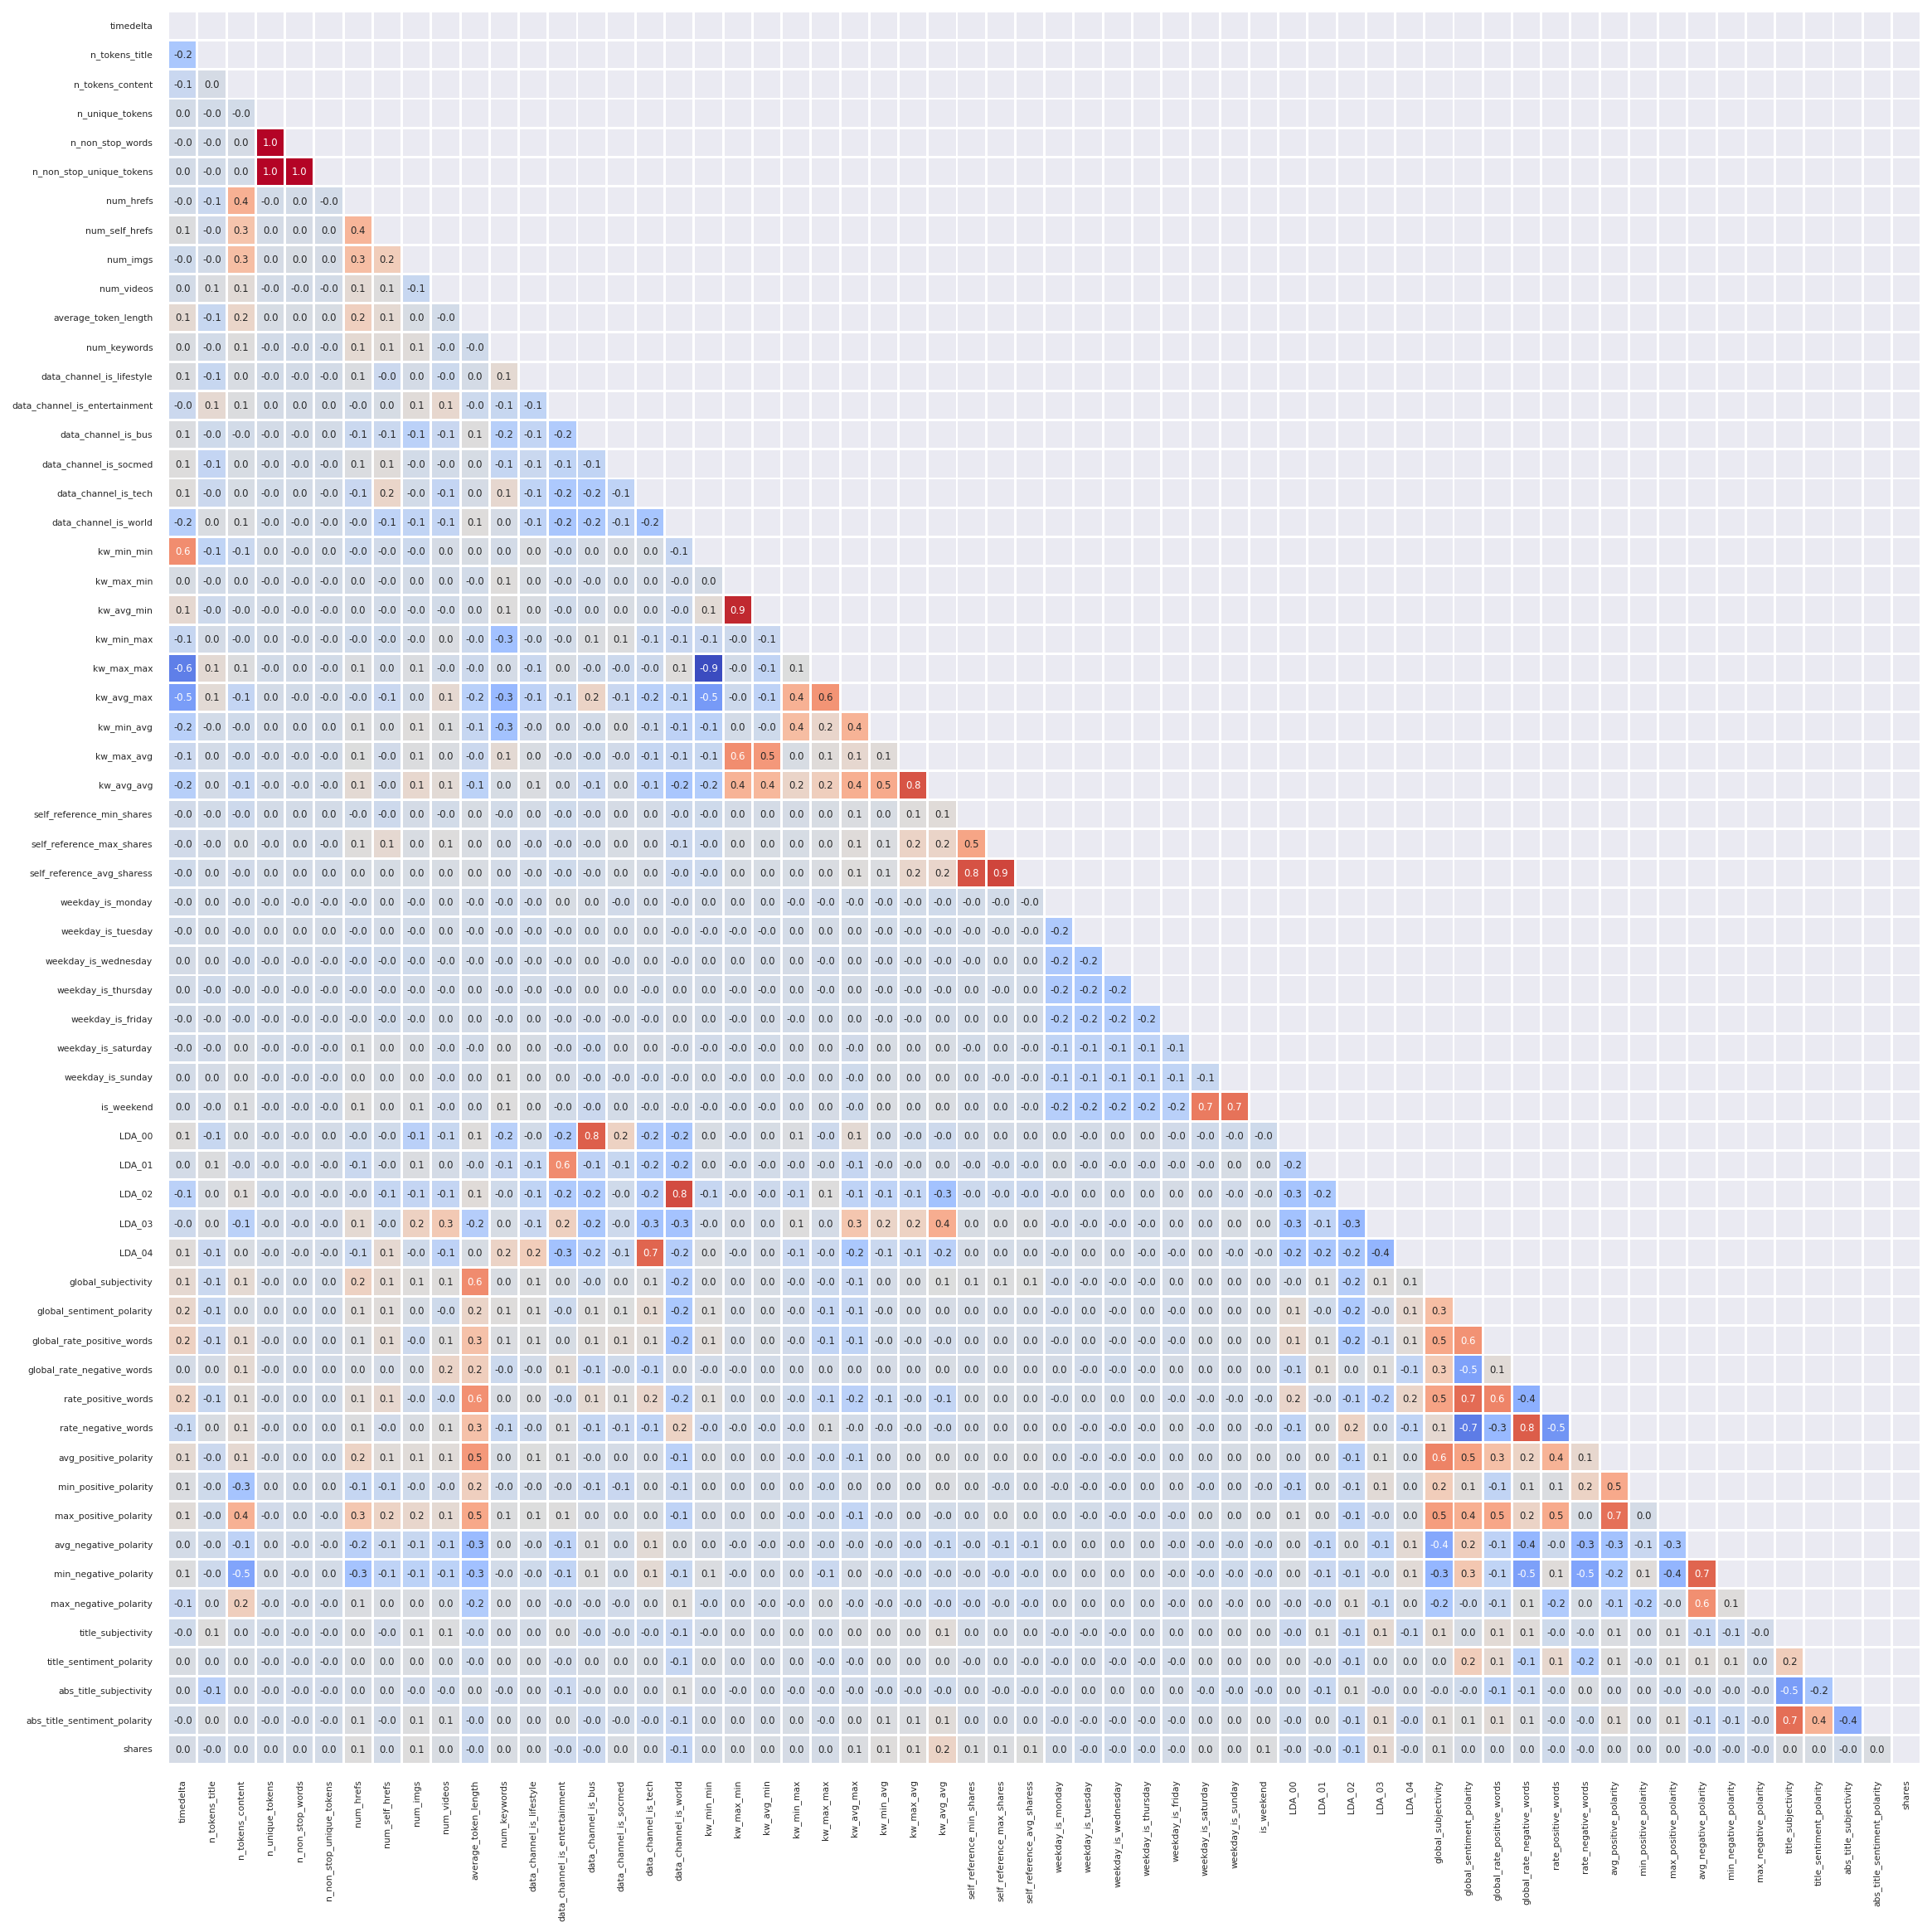

In [ ]:
# Update some default parameters for plotting throughout the notebook
plt.rcParams.update({'font.size': 12, 'xtick.labelsize':15, 'ytick.labelsize':15, 'axes.labelsize':15, 'axes.titlesize':20})
correlation_matrix = df.corr()

# Returns copy of array with upper part of the triangle (which will be masked/hidden)
mask = np.triu(correlation_matrix.corr())

sns.set(font_scale=0.5)
plt.figure(figsize=(20, 20), dpi=140)
sns.heatmap(correlation_matrix, annot=True, fmt='.1f', cmap='coolwarm', 
            square=True, mask=mask, linewidths=1, cbar=False)
plt.show()

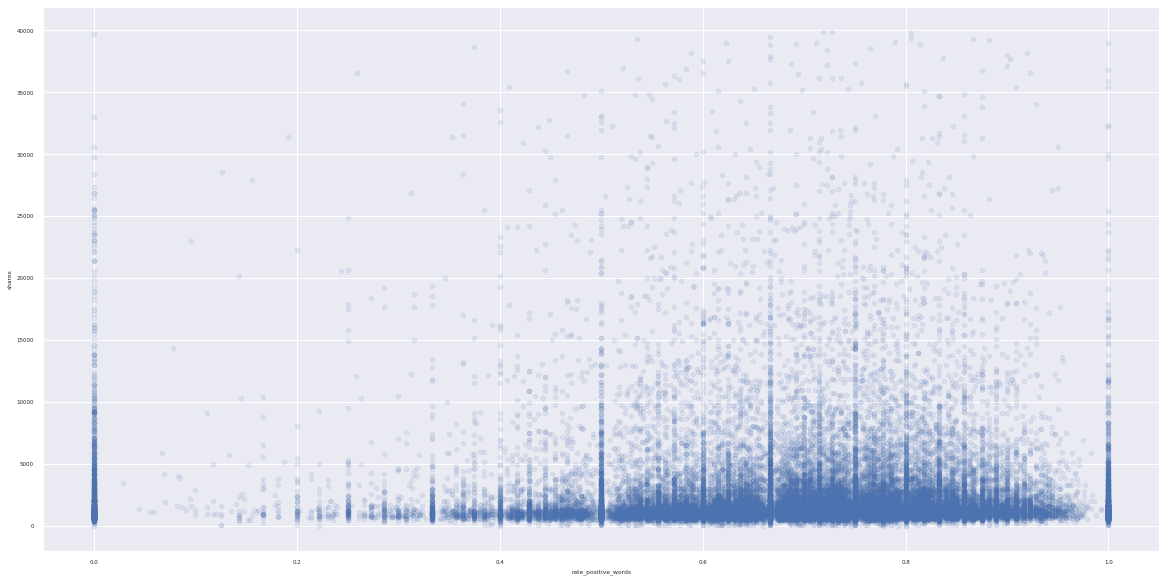

In [ ]:
df.plot(kind="scatter", x="rate_positive_words", y="shares", alpha=0.1, figsize=(20, 10))

El gráfico parece indicar que a mayor rate_positive_words, mayor cantidad de shares.

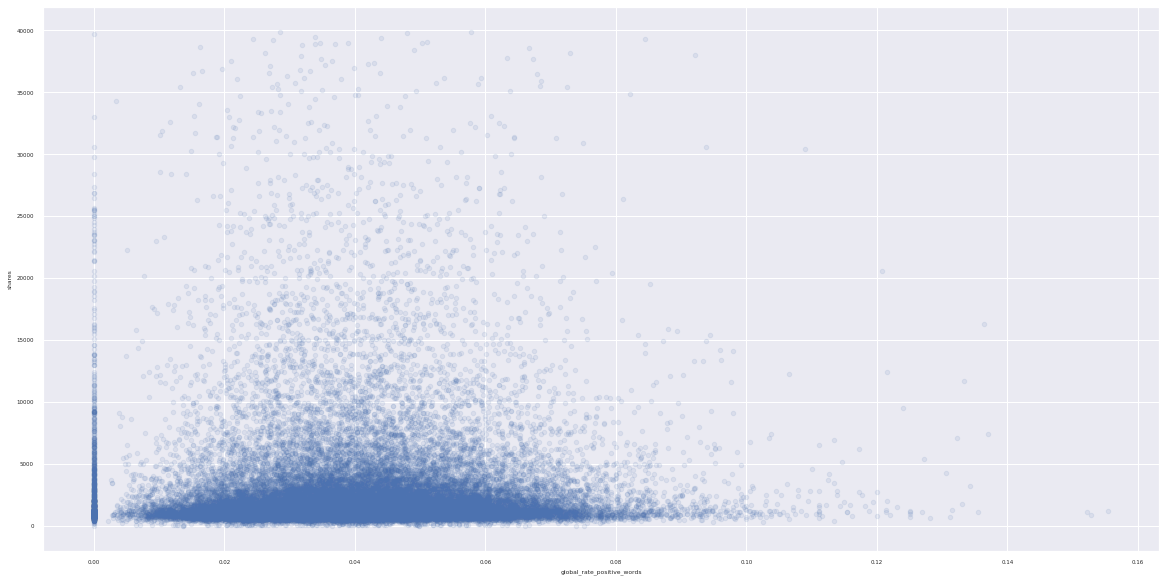

In [ ]:
df.plot(kind="scatter", x="global_rate_positive_words", y="shares", alpha=0.1, figsize=(20, 10))

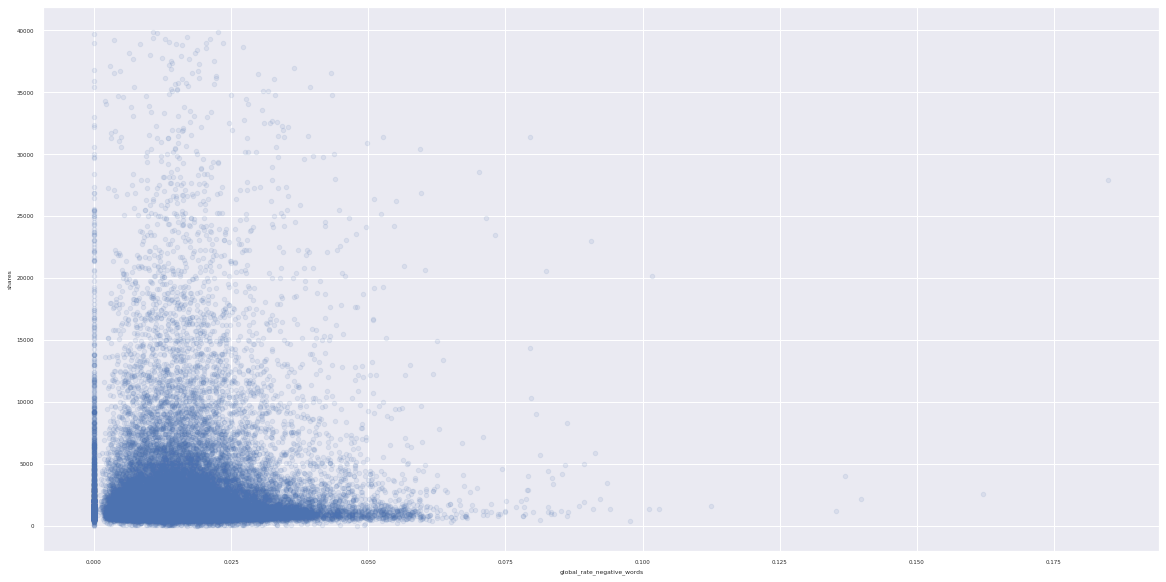

In [ ]:
df.plot(kind="scatter", x="global_rate_negative_words", y="shares", alpha=0.1, figsize=(20, 10))

Mediante prueba y error y teniendo en cuenta la hipótesis de que el día de la semana no afectará mucho el resultado saco features del modelo

In [ ]:
features = [
    # 'timedelta', 
    # Words
    'n_tokens_title', 'n_tokens_content', 
    # 'average_token_length', 
    # 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
    'num_hrefs', 'num_self_hrefs',
    # Digital Media
    # 'num_imgs', 'num_videos', 
    # Links
    'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess', 
    # Time
    # 'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday', 
    # 'is_weekend', 
    # Keywords
    'num_keywords', 
    'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 
    'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world', 
    # Natural Language Processing
    'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 
    'global_subjectivity', 'global_sentiment_polarity', 
    'global_rate_positive_words', 'global_rate_negative_words', 
    'rate_positive_words', 'rate_negative_words', 
    'avg_positive_polarity', 'min_positive_polarity', 'max_positive_polarity', 
    'avg_negative_polarity', 'min_negative_polarity', 'max_negative_polarity', 
    'title_subjectivity', 'title_sentiment_polarity', 'abs_title_subjectivity', 'abs_title_sentiment_polarity'
]

X = df[features]
y = df.shares

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)


# Funcion para comparar distintos modelos
def score_model(model, X_t=train_X, X_v=val_X, y_t=train_y, y_v=val_y):
    model.fit(X_t, y_t)
    preds = model.predict(X_v)
    return mean_absolute_error(y_v, preds), mean_squared_error(y_v, preds)

models = [
    DecisionTreeRegressor(max_leaf_nodes=None, random_state=1),
    DecisionTreeRegressor(max_leaf_nodes=2, random_state=1),
    DecisionTreeRegressor(max_leaf_nodes=3, random_state=1),
    DecisionTreeRegressor(max_leaf_nodes=4, random_state=1),
    DecisionTreeRegressor(max_leaf_nodes=5, random_state=1),
    DecisionTreeRegressor(max_leaf_nodes=6, random_state=1),
    DecisionTreeRegressor(max_leaf_nodes=7, random_state=1),
    DecisionTreeRegressor(max_leaf_nodes=8, random_state=1),
    DecisionTreeRegressor(max_leaf_nodes=9, random_state=1),
    DecisionTreeRegressor(max_leaf_nodes=10, random_state=1),
    DecisionTreeRegressor(max_leaf_nodes=20, random_state=1),
    DecisionTreeRegressor(max_leaf_nodes=30, random_state=1),
    DecisionTreeRegressor(max_leaf_nodes=40, random_state=1),
    DecisionTreeRegressor(max_leaf_nodes=50, random_state=1),
    DecisionTreeRegressor(max_leaf_nodes=500, random_state=1),
    DecisionTreeRegressor(max_leaf_nodes=5000, random_state=1),
#     RandomForestRegressor(random_state=1)
#     RandomForestRegressor(n_estimators=50, random_state=1),
#     RandomForestRegressor(n_estimators=100, random_state=1),
#     # RandomForestRegressor(n_estimators=100, criterion='absolute_error', random_state=1),
#     # RandomForestRegressor(n_estimators=200, min_samples_split=20, random_state=1),
#     # RandomForestRegressor(n_estimators=100, max_depth=7, random_state=1),
    XGBRegressor(), 
    XGBRegressor(n_estimators=500), 
    XGBRegressor(n_estimators=1000, learning_rate=0.05),
]

for i in range(0, len(models)):
    mae, mse = score_model(models[i])
    print("Model %d MAE: %d MSE: %d" % (i+1, mae, mse))

# Pruebo usando early stopping
my_model2 = XGBRegressor(n_estimators=500)
my_model2.fit(train_X, train_y,
              early_stopping_rounds=5, 
             eval_set=[(val_X, val_y)],
             verbose=False)
preds = my_model2.predict(val_X)
print("MAE: " + str(mean_absolute_error(preds, val_y)) + "MSE: " + str(mean_squared_error(preds, val_y)))

Model 1 MAE: 3093 MSE: 35737136
Model 2 MAE: 2178 MSE: 15209147
Model 3 MAE: 2158 MSE: 15083727
Model 4 MAE: 2153 MSE: 15024594
Model 5 MAE: 2154 MSE: 15052712
Model 6 MAE: 2145 MSE: 14984934
Model 7 MAE: 2140 MSE: 14979413
Model 8 MAE: 2136 MSE: 14941631
Model 9 MAE: 2134 MSE: 14934511
Model 10 MAE: 2138 MSE: 14999264
Model 11 MAE: 2140 MSE: 15213776
Model 12 MAE: 2148 MSE: 15671495
Model 13 MAE: 2157 MSE: 15984097
Model 14 MAE: 2154 MSE: 16000998
Model 15 MAE: 2349 MSE: 23626505
Model 16 MAE: 2942 MSE: 34251415
[03:24:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model 17 MAE: 2088 MSE: 14677902
[03:24:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model 18 MAE: 2094 MSE: 14852046
[03:25:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model 19 MAE: 2093 MSE: 14840192
[

El rendimiento del mejor modelo antes de recortar las variables fue  
MAE: 2085.221372929854 MSE: 14669425.000988727  
Y luego de recortarlas:  
MAE: 2089.001336359132 MSE: 14674543.644854765  
Por lo que se ve que hubo un muy ligero empeoramiento, pero es casi despreciable, parece ser que vale la pena eliminar esas features para simplificar el problema y redicir tiempos de computo.

Se observa del analisis de histogramas de los features individuales que parece haber varios que pueden normalizarse (poseen skew). Ahora intento corregirlo para mejorar el comportamiento.

In [ ]:
list_of_features_to_apply_sqrt = [
    # Words
    'n_tokens_content', 
    'num_hrefs', 'num_self_hrefs',
    'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess', 

    # Natural Language Processing
    'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 
    'global_rate_negative_words',
]

for feature in list_of_features_to_apply_sqrt:
  df[feature] = df[feature].apply(np.sqrt)

X = df[features]
y = df.shares


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


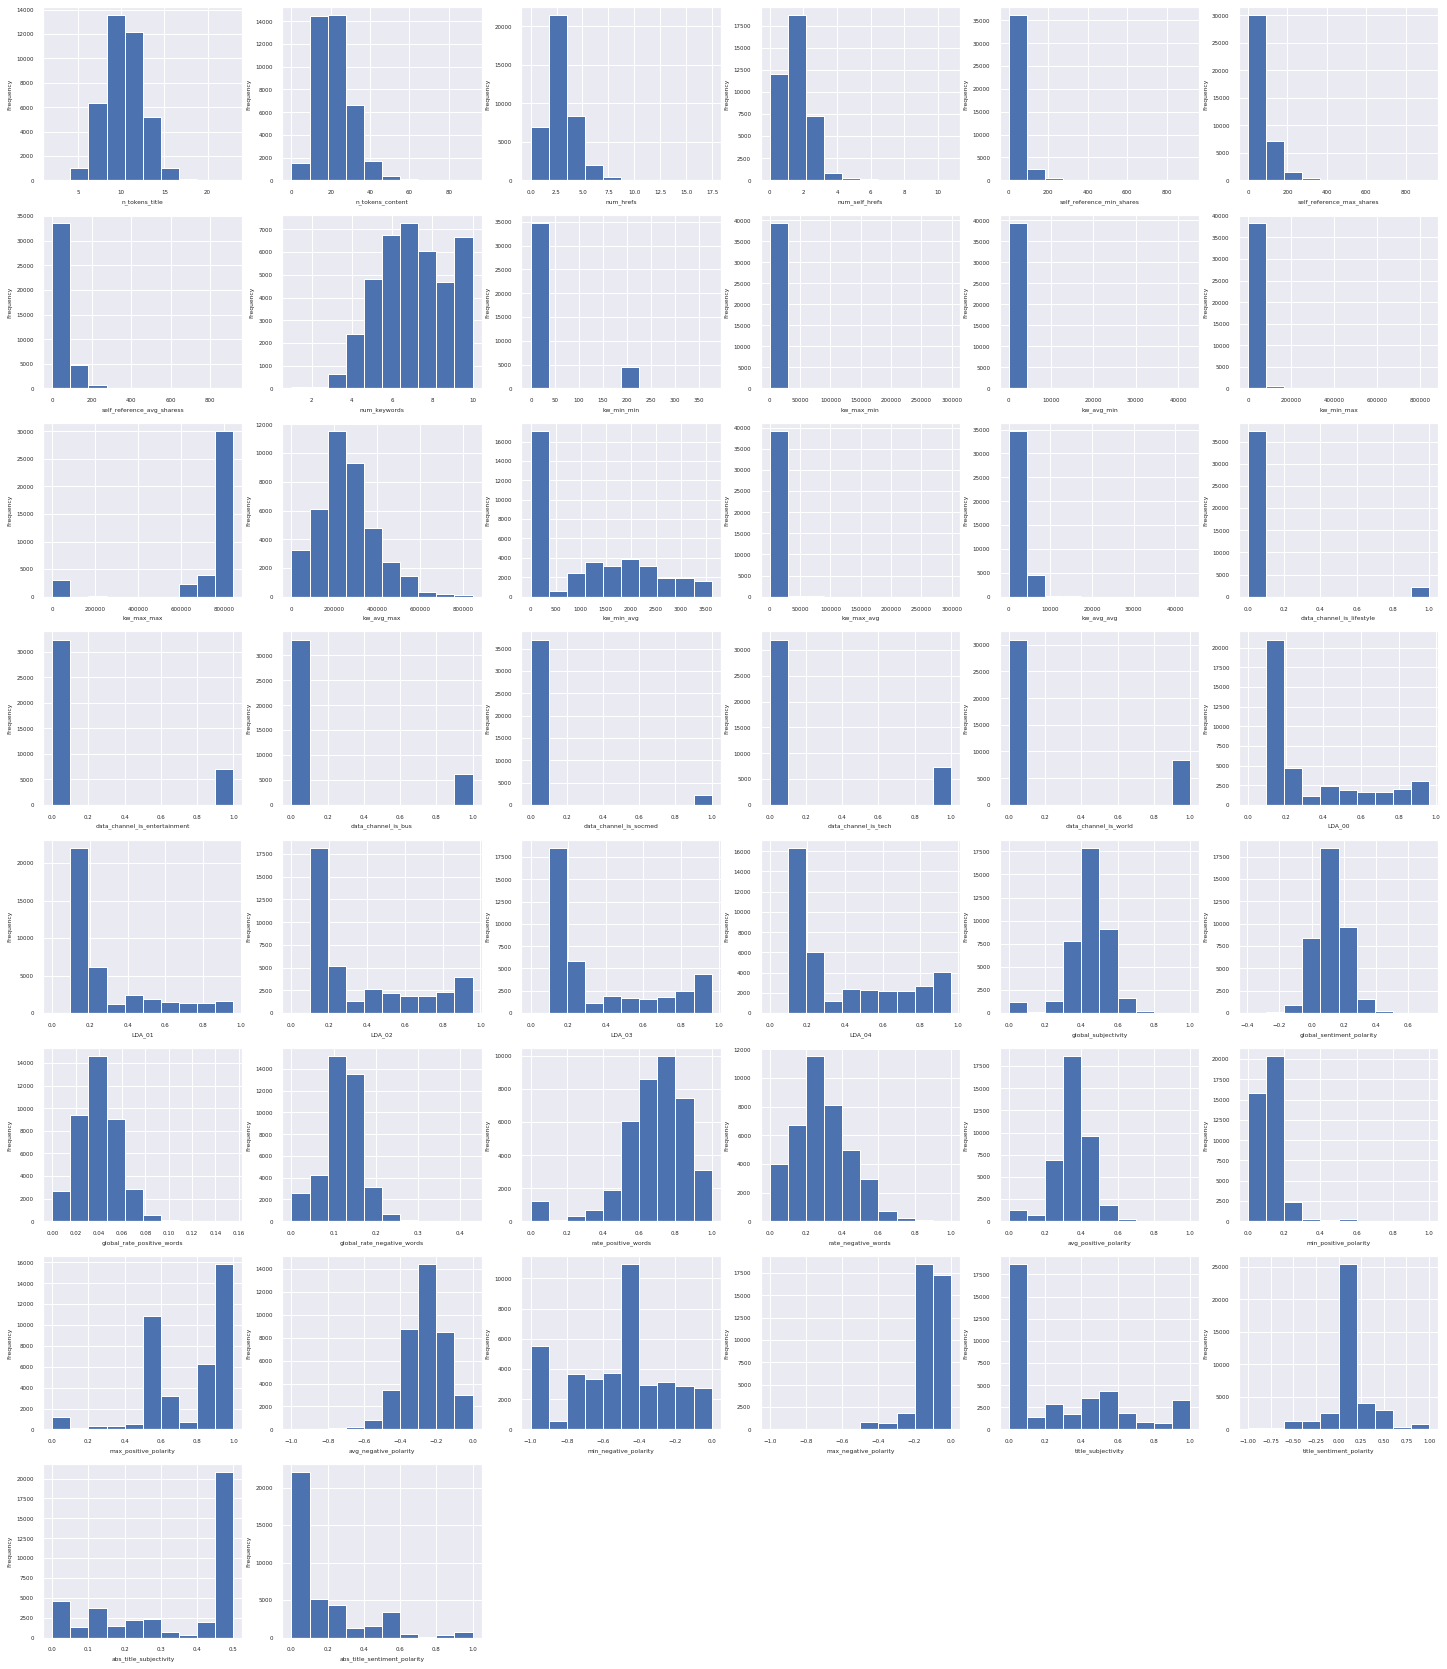

In [ ]:
# univariate analysis
fig = plt.figure(figsize=(25, 30))  
i = 0
for column in X:
    sub = fig.add_subplot(8, 6 , i + 1)
    sub.set_xlabel(column)
    X[column].plot(kind = 'hist')
    i = i + 1

Se ve que los features corregidos tienen ahora mas a la normalidad.

In [ ]:
features = [
    # 'timedelta', 
    # Words
    'n_tokens_title', 'n_tokens_content', 
    # 'average_token_length', 
    # 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
    'num_hrefs', 'num_self_hrefs',
    # Digital Media
    # 'num_imgs', 'num_videos', 
    # Links
    'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess', 
    # Time
    # 'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday', 
    # 'is_weekend', 
    # Keywords
    'num_keywords', 
    'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 
    'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world', 
    # Natural Language Processing
    'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 
    'global_subjectivity', 'global_sentiment_polarity', 
    'global_rate_positive_words', 'global_rate_negative_words', 
    'rate_positive_words', 'rate_negative_words', 
    'avg_positive_polarity', 'min_positive_polarity', 'max_positive_polarity', 
    'avg_negative_polarity', 'min_negative_polarity', 'max_negative_polarity', 
    'title_subjectivity', 'title_sentiment_polarity', 'abs_title_subjectivity', 'abs_title_sentiment_polarity'
]

X = df[features]
y = df.shares

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)


# Funcion para comparar distintos modelos
def score_model(model, X_t=train_X, X_v=val_X, y_t=train_y, y_v=val_y):
    model.fit(X_t, y_t)
    preds = model.predict(X_v)
    return mean_absolute_error(y_v, preds), mean_squared_error(y_v, preds)

models = [
    DecisionTreeRegressor(max_leaf_nodes=None, random_state=1),
    DecisionTreeRegressor(max_leaf_nodes=2, random_state=1),
    DecisionTreeRegressor(max_leaf_nodes=3, random_state=1),
    DecisionTreeRegressor(max_leaf_nodes=4, random_state=1),
    DecisionTreeRegressor(max_leaf_nodes=5, random_state=1),
    DecisionTreeRegressor(max_leaf_nodes=6, random_state=1),
    DecisionTreeRegressor(max_leaf_nodes=7, random_state=1),
    DecisionTreeRegressor(max_leaf_nodes=8, random_state=1),
    DecisionTreeRegressor(max_leaf_nodes=9, random_state=1),
    DecisionTreeRegressor(max_leaf_nodes=10, random_state=1),
    DecisionTreeRegressor(max_leaf_nodes=20, random_state=1),
    DecisionTreeRegressor(max_leaf_nodes=30, random_state=1),
    DecisionTreeRegressor(max_leaf_nodes=40, random_state=1),
    DecisionTreeRegressor(max_leaf_nodes=50, random_state=1),
    DecisionTreeRegressor(max_leaf_nodes=500, random_state=1),
    DecisionTreeRegressor(max_leaf_nodes=5000, random_state=1),
#     RandomForestRegressor(random_state=1)
#     RandomForestRegressor(n_estimators=50, random_state=1),
#     RandomForestRegressor(n_estimators=100, random_state=1),
#     # RandomForestRegressor(n_estimators=100, criterion='absolute_error', random_state=1),
#     # RandomForestRegressor(n_estimators=200, min_samples_split=20, random_state=1),
#     # RandomForestRegressor(n_estimators=100, max_depth=7, random_state=1),
    XGBRegressor(), 
    XGBRegressor(n_estimators=500), 
    XGBRegressor(n_estimators=1000, learning_rate=0.05),
]

for i in range(0, len(models)):
    mae, mse = score_model(models[i])
    print("Model %d MAE: %d MSE: %d" % (i+1, mae, mse))

# Pruebo usando early stopping
my_model2 = XGBRegressor(n_estimators=500)
my_model2.fit(train_X, train_y,
              early_stopping_rounds=5, 
             eval_set=[(val_X, val_y)],
             verbose=False)
preds = my_model2.predict(val_X)
print("MAE: " + str(mean_absolute_error(preds, val_y)) + "MSE: " + str(mean_squared_error(preds, val_y)))

Model 1 MAE: 3070 MSE: 35895212
Model 2 MAE: 2178 MSE: 15209147
Model 3 MAE: 2158 MSE: 15083727
Model 4 MAE: 2153 MSE: 15024594
Model 5 MAE: 2154 MSE: 15052712
Model 6 MAE: 2145 MSE: 14984934
Model 7 MAE: 2140 MSE: 14979413
Model 8 MAE: 2136 MSE: 14941631
Model 9 MAE: 2134 MSE: 14934511
Model 10 MAE: 2138 MSE: 14999264
Model 11 MAE: 2140 MSE: 15213776
Model 12 MAE: 2148 MSE: 15671495
Model 13 MAE: 2157 MSE: 15984097
Model 14 MAE: 2154 MSE: 16000998
Model 15 MAE: 2348 MSE: 23843489
Model 16 MAE: 2952 MSE: 35118514
[03:26:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model 17 MAE: 2088 MSE: 14679631
[03:26:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model 18 MAE: 2096 MSE: 14842619
[03:27:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model 19 MAE: 2097 MSE: 14845274
[

Con respecto a los valores anteriores:  
MAE: 2089.001336359132 MSE: 14674543.644854765  
Se logró un muy ligero empeoramiento:  
MAE: 2089.4773640152353MSE: 14678665.893902794  
Por lo que esta corrección parece no haber dado buen resultado.

# Clasificación
Entreno los modelos de clasificación usando la misma configuración que para regresión. Los modelos son los mismos pero en su versión para clasificación.

In [ ]:
features = [
    # 'timedelta', 
    # Words
    'n_tokens_title', 'n_tokens_content', 
    # 'average_token_length', 
    # 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
    'num_hrefs', 'num_self_hrefs',
    # Digital Media
    # 'num_imgs', 'num_videos', 
    # Links
    'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess', 
    # Time
    # 'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday', 
    # 'is_weekend', 
    # Keywords
    'num_keywords', 
    'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 
    'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world', 
    # Natural Language Processing
    'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 
    'global_subjectivity', 'global_sentiment_polarity', 
    'global_rate_positive_words', 'global_rate_negative_words', 
    'rate_positive_words', 'rate_negative_words', 
    'avg_positive_polarity', 'min_positive_polarity', 'max_positive_polarity', 
    'avg_negative_polarity', 'min_negative_polarity', 'max_negative_polarity', 
    'title_subjectivity', 'title_sentiment_polarity', 'abs_title_subjectivity', 'abs_title_sentiment_polarity'
]

X = df[features]
y = df.shares_clasif

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)


# Funcion para comparar distintos modelos
def score_model(model, X_t=train_X, X_v=val_X, y_t=train_y, y_v=val_y):
    model.fit(X_t, y_t)
    preds = model.predict(X_v)
    return accuracy_score(y_v, preds)

models = [
    DecisionTreeClassifier(max_leaf_nodes=None, random_state=1),
    DecisionTreeClassifier(max_leaf_nodes=2, random_state=1),
    DecisionTreeClassifier(max_leaf_nodes=3, random_state=1),
    DecisionTreeClassifier(max_leaf_nodes=4, random_state=1),
    DecisionTreeClassifier(max_leaf_nodes=5, random_state=1),
    DecisionTreeClassifier(max_leaf_nodes=6, random_state=1),
    DecisionTreeClassifier(max_leaf_nodes=7, random_state=1),
    DecisionTreeClassifier(max_leaf_nodes=8, random_state=1),
    DecisionTreeClassifier(max_leaf_nodes=9, random_state=1),
    DecisionTreeClassifier(max_leaf_nodes=10, random_state=1),
    DecisionTreeClassifier(max_leaf_nodes=20, random_state=1),
    DecisionTreeClassifier(max_leaf_nodes=30, random_state=1),
    DecisionTreeClassifier(max_leaf_nodes=40, random_state=1),
    DecisionTreeClassifier(max_leaf_nodes=50, random_state=1),
    DecisionTreeClassifier(max_leaf_nodes=500, random_state=1),
    DecisionTreeClassifier(max_leaf_nodes=5000, random_state=1),
    RandomForestClassifier(random_state=1),
    RandomForestClassifier(n_estimators=50, random_state=1),
    RandomForestClassifier(n_estimators=100, random_state=1),
    # RandomForestClassifier(n_estimators=100, criterion='absolute_error', random_state=1),
    # RandomForestClassifier(n_estimators=200, min_samples_split=20, random_state=1),
    # RandomForestClassifier(n_estimators=100, max_depth=7, random_state=1),
    XGBClassifier(), 
    XGBClassifier(n_estimators=500), 
    XGBClassifier(n_estimators=1000, learning_rate=0.05),
]

for i in range(0, len(models)):
    acc = score_model(models[i])
    print("Model %d Accuracy: %f" % (i+1, acc))

# Pruebo usando early stopping
my_model2 = XGBClassifier(n_estimators=500)
my_model2.fit(train_X, train_y,
              early_stopping_rounds=5, 
             eval_set=[(val_X, val_y)],
             verbose=False)
preds = my_model2.predict(val_X)
print("Accuracy: " + str(accuracy_score(preds, val_y)))

Model 1 Accuracy: 0.248007
Model 2 Accuracy: 0.267985
Model 3 Accuracy: 0.271113
Model 4 Accuracy: 0.276662
Model 5 Accuracy: 0.276662
Model 6 Accuracy: 0.279588
Model 7 Accuracy: 0.279588
Model 8 Accuracy: 0.278882
Model 9 Accuracy: 0.283120
Model 10 Accuracy: 0.283120
Model 11 Accuracy: 0.288871
Model 12 Accuracy: 0.293008
Model 13 Accuracy: 0.293916
Model 14 Accuracy: 0.294219
Model 15 Accuracy: 0.284028
Model 16 Accuracy: 0.250126
Model 17 Accuracy: 0.301786
Model 18 Accuracy: 0.290990
Model 19 Accuracy: 0.301786
Model 20 Accuracy: 0.316214
Model 21 Accuracy: 0.314600
Model 22 Accuracy: 0.314398
Accuracy: 0.29805266875189185


La mejor precisión observada es de 0.318 para el modelo 20, que es el XGBClassifier() sin parámetros. Esta precisión supera la linea de base aleatoria de 0.2.

Para ese modelo vamos a calcular y mostrar las matrices de confusion.

In [ ]:
my_model2 = XGBClassifier()
my_model2.fit(train_X, train_y)
preds = my_model2.predict(val_X)
print("Accuracy: " + str(accuracy_score(preds, val_y)))


confusion = confusion_matrix(val_y, preds)
print(f"Confusion matrix:\n{confusion}")

print(f"\nNormalized confusion matrix:")
for row in confusion:
    print(row / row.sum())


print(f"\nProbs:")
probs = my_model2.predict_proba(val_X)
print(probs)


print(f"\nClassification report:")
report = classification_report(val_y, preds)
print(report)

Accuracy: 0.31621430733528405
Confusion matrix:
[[147 349 528 496 369]
 [159 415 372 574 297]
 [137 243 753 441 666]
 [107 355 291 925 268]
 [ 84 127 602 312 894]]

Normalized confusion matrix:
[0.07781895 0.18475384 0.27951297 0.26257279 0.19534145]
[0.08750688 0.22839846 0.20473308 0.31590534 0.16345625]
[0.06116071 0.10848214 0.33616071 0.196875   0.29732143]
[0.05498458 0.18242549 0.14953751 0.47533402 0.1377184 ]
[0.04160475 0.06290243 0.29816741 0.15453195 0.44279346]

Probs:
[[0.20386672 0.10750477 0.34347168 0.0690873  0.27606955]
 [0.17825504 0.23596886 0.2241451  0.15964583 0.20198514]
 [0.28839678 0.27310723 0.1894298  0.15224674 0.09681943]
 ...
 [0.20587832 0.10839653 0.3830459  0.06823114 0.23444806]
 [0.2515199  0.3312027  0.13662685 0.1909773  0.08967327]
 [0.172007   0.12765108 0.2947282  0.10166623 0.3039475 ]]

Classification report:
              precision    recall  f1-score   support

     Average       0.23      0.08      0.12      1889
        Good       0.28   

Probamos si valores numéricos para la columna de clasificación funcionan mejor

In [ ]:
def get_label2(share):
  if share == 'Very Poor':
    return 0
  elif share == 'Poor':
    return 1
  elif share == 'Average':
    return 2
  elif share == 'Good':
    return 3
  else:
    return 4

df['shares_clasif'] = df['shares_clasif'].apply(get_label2)
df

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,shares_clasif
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,0
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,0
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,2
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,1
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,http://mashable.com/2014/12/27/samsung-app-aut...,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,...,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800,2
39640,http://mashable.com/2014/12/27/seth-rogen-jame...,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,...,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900,3
39641,http://mashable.com/2014/12/27/son-pays-off-mo...,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,...,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900,3
39642,http://mashable.com/2014/12/27/ukraine-blasts/,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,...,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100,1


In [ ]:
X = df[features]
y = df.shares_clasif

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)


my_model2 = XGBClassifier()
my_model2.fit(train_X, train_y)
preds = my_model2.predict(val_X)
print("Accuracy: " + str(accuracy_score(preds, val_y)))


confusion = confusion_matrix(val_y, preds)
print(f"Confusion matrix:\n{confusion}")

print(f"\nNormalized confusion matrix:")
for row in confusion:
    print(row / row.sum())


print(f"\nProbs:")
probs = my_model2.predict_proba(val_X)
print(probs)


print(f"\nClassification report:")
report = classification_report(val_y, preds)
print(report)

Accuracy: 0.31621430733528405
Confusion matrix:
[[894 602  84 127 312]
 [666 753 137 243 441]
 [369 528 147 349 496]
 [297 372 159 415 574]
 [268 291 107 355 925]]

Normalized confusion matrix:
[0.44279346 0.29816741 0.04160475 0.06290243 0.15453195]
[0.29732143 0.33616071 0.06116071 0.10848214 0.196875  ]
[0.19534145 0.27951297 0.07781895 0.18475384 0.26257279]
[0.16345625 0.20473308 0.08750688 0.22839846 0.31590534]
[0.1377184  0.14953751 0.05498458 0.18242549 0.47533402]

Probs:
[[0.27606955 0.34347168 0.20386672 0.10750477 0.0690873 ]
 [0.20198514 0.2241451  0.17825504 0.23596886 0.15964583]
 [0.09681943 0.1894298  0.28839678 0.27310723 0.15224674]
 ...
 [0.23444806 0.3830459  0.20587832 0.10839653 0.06823114]
 [0.08967327 0.13662685 0.2515199  0.3312027  0.1909773 ]
 [0.3039475  0.2947282  0.172007   0.12765108 0.10166623]]

Classification report:
              precision    recall  f1-score   support

           0       0.36      0.44      0.40      2019
           1       0.30   

Los valores de accuracy resultan ser iguales, pero no los de precision, recall, f1-score y support

In [ ]:
holaa

holaa